Dataset Loaded Successfully
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
Missing values in each column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Decision Tree Accuracy: 0.9853658536585366
Pruned Tree Accuracy: 0.8
Random Forest Accuracy: 0.9853658536585366


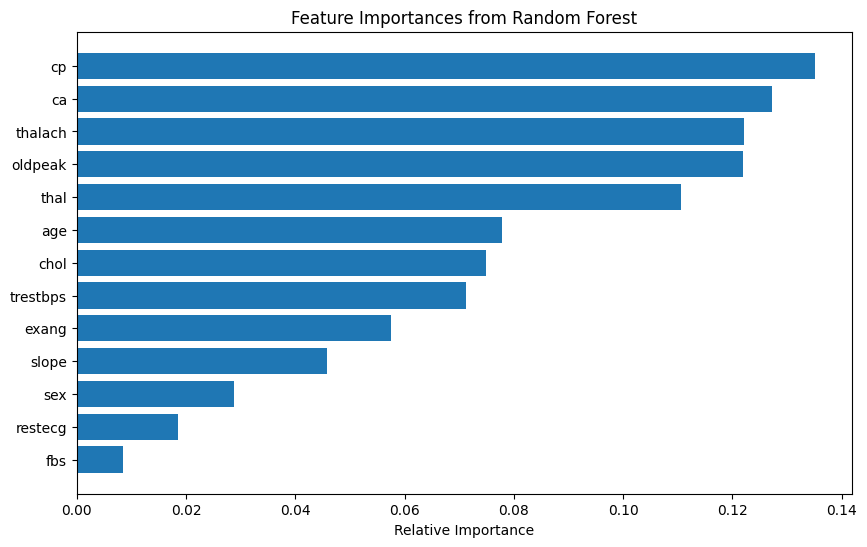

Decision Tree CV Accuracy: 0.8341463414634147
Random Forest CV Accuracy: 0.9970731707317073


In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import graphviz

# Step 2: Load and Explore the Dataset
# Upload heart.csv from your drive
df = pd.read_csv('/content/heart.csv')
print("Dataset Loaded Successfully")

# Optional: See the first few rows
print(df.head())

# Step 3: Check for Missing Values
print("Missing values in each column:\n", df.isnull().sum())

# Step 4: Define Features and Target
X = df.drop('target', axis=1)
y = df['target']

# Step 5: Split Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train a Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Step 7: Visualize the Decision Tree
dot_data = tree.export_graphviz(dtree, out_file=None,
                                feature_names=X.columns,
                                class_names=["No Disease", "Disease"],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("heart_decision_tree", format='png', cleanup=True)
graph

# Step 8: Prune the Tree (Control Depth)
dtree_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree_pruned.fit(X_train, y_train)
y_pred_pruned = dtree_pruned.predict(X_test)

print("Pruned Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))

# Step 9: Train a Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Step 10: Plot Feature Importances
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.title("Feature Importances from Random Forest")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Step 11: Evaluate Models using Cross-Validation
dt_scores = cross_val_score(dtree_pruned, X, y, cv=5)
rf_scores = cross_val_score(rf, X, y, cv=5)

print("Decision Tree CV Accuracy:", dt_scores.mean())
print("Random Forest CV Accuracy:", rf_scores.mean())
